In [1]:
!pip install git+https://github.com/suno-ai/bark.git

  Cloning https://github.com/suno-ai/bark.git to /tmp/pip-req-build-rh7jat7w
  Running command git clone --filter=blob:none --quiet https://github.com/suno-ai/bark.git /tmp/pip-req-build-rh7jat7w
  Resolved https://github.com/suno-ai/bark.git to commit f4f32d4cd480dfec1c245d258174bc9bde3c2148
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 74.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 8.5 MB/s eta 0:00:00
  Created wheel for suno-bark: filename=suno_bark-0.0.1a0-py3-none-any.whl size=2567358 sha256=4ca58f860f9694acb1246a74d4f32301bc29b54b5107cdeb1d4e0c5c6ab7e95a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ea

In [2]:
from bark import SAMPLE_RATE, generate_audio, preload_models
from scipy.io.wavfile import write as write_wav
from IPython.display import Audio

# download and load all models
preload_models()

def suno(text_prompt):
    # generate audio from text
    audio_array = generate_audio(text_prompt)

    # save audio to disk
    write_wav("suno.wav", SAMPLE_RATE, audio_array)

    # play text in notebook
    display(Audio(audio_array, rate=SAMPLE_RATE))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


text_2.pt:   0%|          | 0.00/5.35G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/bark/generation.py:212: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=device)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

coarse_2.pt:   0%|          | 0.00/3.93G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/bark/generation.py:212: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=device)


fine_2.pt:   0%|          | 0.00/3.74G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
Downloading: "https://dl.fbaipublicfiles.com/encodec/v0/encodec_24khz-d7cc33bc.th" to /root/.cache/torch/hub/checkpoints/encodec_24khz-d7cc33bc.th
100%|██████████| 88.9M/88.9M [00:00<00:00, 125MB/s]


In [3]:
%pip install librosa scipy noisereduce

In [47]:
import librosa
import numpy as np
import librosa.display
import noisereduce as nr
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from IPython.display import Audio, display

def remove_noise_and_silence(input_audio_path, silence_threshold=0.01, min_speech_duration=0.2):
    audio, sample_rate = librosa.load(input_audio_path, sr=None)
    print(f"Sample rate: {sample_rate} Hz")

    # Estimate noise using the first second of audio
    noise_sample = audio[:sample_rate]
    reduced_noise_audio = nr.reduce_noise(y=audio, sr=sample_rate, y_noise=noise_sample)
    write(f"denoised.wav", sample_rate, (reduced_noise_audio * 32767).astype(np.int16))

    # Detect non-silent intervals
    intervals = librosa.effects.split(
        reduced_noise_audio,
        top_db=-20 * np.log10(silence_threshold),
        frame_length=2048,
        hop_length=512
    )

    # Trim silence and concatenate non-silent segments
    trimmed_audio = np.concatenate([
        reduced_noise_audio[start:end]
        for start, end in intervals
        if (end - start) / sample_rate > min_speech_duration
    ])
    write("trimmed.wav", sample_rate, (trimmed_audio * 32767).astype(np.int16))

    # Display details
    original_duration = len(audio) / sample_rate
    trimmed_duration = len(trimmed_audio) / sample_rate
    print(f"Original audio duration: {original_duration:.2f} seconds")
    print(f"Denoised duration: {trimmed_duration:.2f} seconds")

    # Embed Denoised Audio
    print("Denoise Audio: ")
    display(Audio(data="denoised.wav", autoplay=False))
    print("Trimmed Audio: ")
    display(Audio(data="trimmed.wav", autoplay=False))

    # Plot waveforms
    def plot_waveform(audio_data, title, sample_rate):
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(audio_data, sr=sample_rate)
        plt.title(title)
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.tight_layout()
        plt.show()

    plot_waveform(audio, "Original Audio Waveform", sample_rate)
    plot_waveform(trimmed_audio, "Denoised and Trimmed Audio Waveform", sample_rate)

100%|██████████| 32/32 [00:41<00:00,  1.30s/it]


Sample rate: 24000 Hz
Original audio duration: 12.56 seconds
Denoised duration: 10.99 seconds


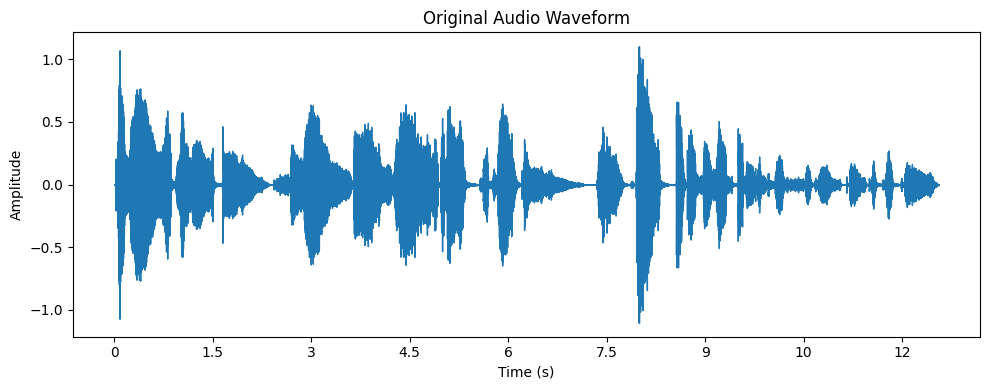

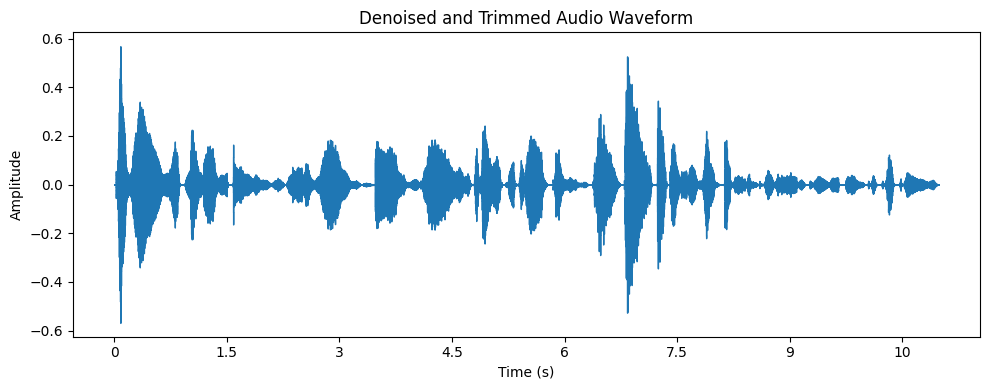

In [55]:
text = """Hello, my name is Suno. And, uh — and I like pizza. [laughs]
But I also have other interests such as playing tic tac toe."""
s2T = suno(text)
remove_noise_and_silence("suno.wav")

100%|██████████| 32/32 [00:41<00:00,  1.30s/it]


Sample rate: 24000 Hz
Original audio duration: 12.60 seconds
Denoised duration: 6.87 seconds


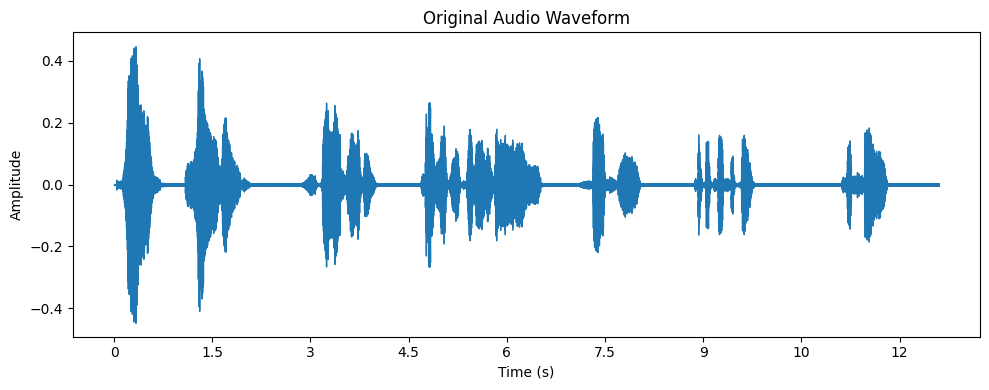

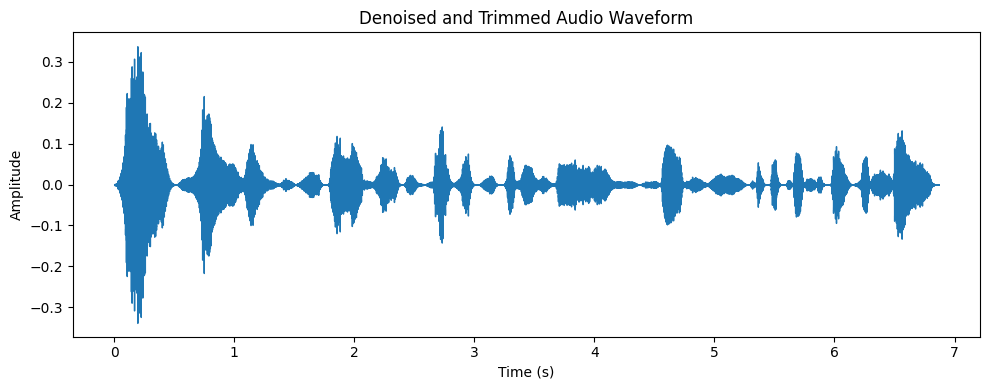

In [58]:
text = """Yo, losers!
Still breathing?
Don't make me come over there and *force* you to participate.
Just sayin'.
🐔"""
s2T = suno(text)
remove_noise_and_silence("suno.wav")

100%|██████████| 29/29 [00:42<00:00,  1.45s/it]


Sample rate: 24000 Hz
Original audio duration: 11.44 seconds
Denoised duration: 4.37 seconds


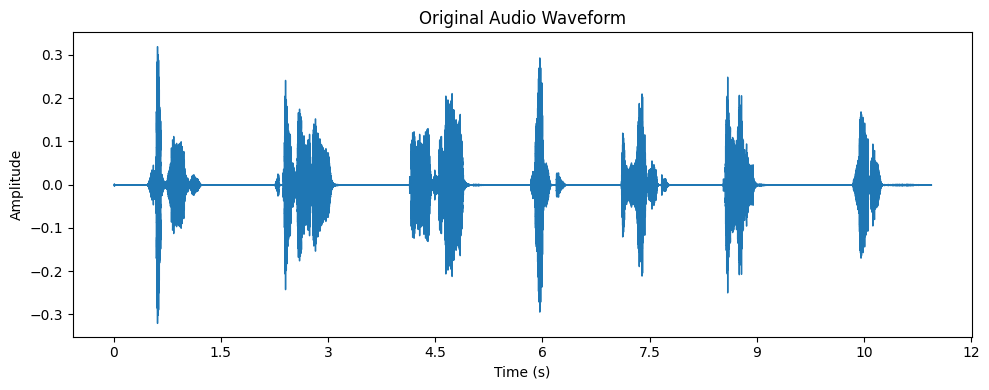

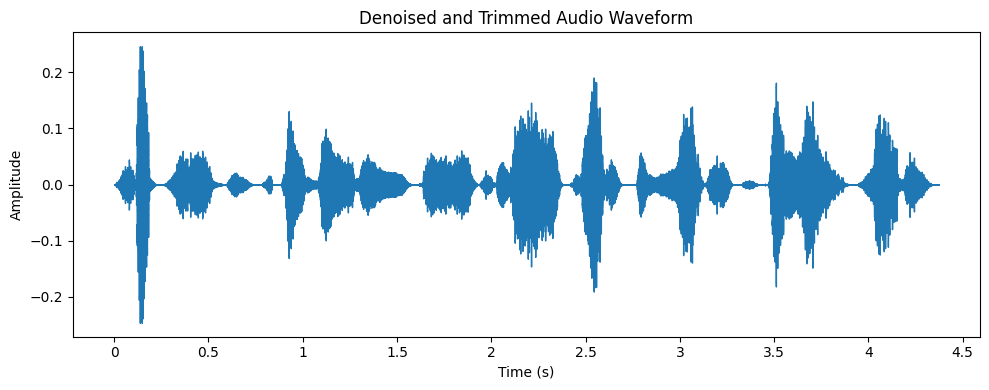

In [57]:
text = """Sup, nerds. Still breathing? Don't answer that. Just... exist. For a while. Maybe."""
s2T = suno(text)
remove_noise_and_silence("suno.wav")